## Task: reproduce the data visualization below using Matplotlib. The figure uses data from Hans Rosling's Gapminder site.

### Data sets:
#### 1. gdp_clean.csv: Gross domestic product per capita— a proxy for average income
#### 2. life_exp_clean.csv: Life expectancy
#### 3. pop_clean.csv: Population
#### 4. countrycodes.csv: shows country codes,region codes 

### Process:
#### Import Libraries
#### Data Check
#### Data Preprocessing: reshape dataset from wide to long format, merge data, drop data, convert data type
#### Create Scatter Plot


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# input datasets
gdp_data = pd.read_csv("gdp_clean.csv")
life_exp_data = pd.read_csv("life_exp_clean.csv")
pop_data = pd.read_csv("pop_clean.csv")
countrycodes_data = pd.read_csv("countrycodes.csv")
# check dataset   
gdp_data.info(), life_exp_data.info(), pop_data.info(), countrycodes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Columns: 217 entries, Country to 2015
dtypes: int64(216), object(1)
memory usage: 312.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Columns: 217 entries, Country to 2015
dtypes: float64(216), object(1)
memory usage: 312.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Columns: 217 entries, Country to 2015
dtypes: int64(216), object(1)
memory usage: 312.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          249 non-null    object 
 1   code_2           248 non-null    object 
 2   code_3           249 non-null    object 
 3   country_code     249 non-null    int64  
 4   iso_3166_2       249 non-null    object 
 5   continent        240 non-null    object 
 6   sub_region       240 non-null

(None, None, None, None)

In [3]:
# choose years
years = [1850, 1900, 1950, 2000]     

In [4]:
# preprocess the data to merge different data sets correctly

## reshape each dataset from wide to long format
gdp_long = gdp_data.melt(id_vars=['Country'], var_name='Year', value_name='GDP_per_capita')
life_exp_long = life_exp_data.melt(id_vars=['Country'], var_name='Year', value_name='Life_Expectancy')
pop_long = pop_data.melt(id_vars=['Country'], var_name='Year', value_name='Population')

## merge the datasets on 'Country' and 'Year'
merged_data = pd.merge(gdp_long, life_exp_long, on=['Country', 'Year']) 
merged_data = pd.merge(merged_data, pop_long, on=['Country', 'Year'])

## add continent information by merging with country_codes
merged_data = pd.merge(merged_data,
                       countrycodes_data[['country', 'continent']],
                       left_on='Country', right_on='country',
                       how='left')

## drop the redundant 'country' column
merged_data.drop(columns=['country'], inplace=True)   

merged_data   

,Country,Year,GDP_per_capita,Life_Expectancy,Population,continent
0,Afghanistan,1800,603,28.21,3280000,Asia
1,Albania,1800,667,35.40,400000,Europe
2,Algeria,1800,716,28.82,2500000,Africa
3,Angola,1800,618,26.98,1567028,Africa
4,Antigua and Barbuda,1800,757,33.54,37000,Americas
...,...,...,...,...,...,...
39739,Venezuela,2015,15753,74.80,30081827,Americas
39740,Vietnam,2015,5623,75.40,92677082,Asia
39741,Yemen,2015,3887,66.00,26497881,Asia
39742,Zambia,2015,4034,56.70,15879370,Africa


In [5]:
#check all data types if I need to convert some data
merged_data.dtypes   

Country             object
Year                object
GDP_per_capita       int64
Life_Expectancy    float64
Population           int64
continent           object
dtype: object

In [6]:
# convert object to int
merged_data['Year'] = merged_data['Year'].astype(int)
# use years to plot
filter_data = merged_data[merged_data['Year'].isin(years)]
filter_data    

,Country,Year,GDP_per_capita,Life_Expectancy,Population,continent
9200,Afghanistan,1850,669,27.70,3752993,Asia
9201,Albania,1850,717,35.40,501490,Europe
9202,Algeria,1850,1017,15.00,2852648,Africa
9203,Angola,1850,769,26.98,2418020,Africa
9204,Antigua and Barbuda,1850,929,33.54,37000,Americas
...,...,...,...,...,...,...
36979,Venezuela,2000,14461,73.80,24192449,Americas
36980,Vietnam,2000,2650,72.00,79910411,Asia
36981,Yemen,2000,4017,62.40,17409071,Asia
36982,Zambia,2000,2202,44.80,10415942,Africa


In [11]:
# Define a color scheme for continents      
continent_color_map = {
    "Asia": "red",          
    "Europe": "green",    
    "Africa": "blue",     
    "Oceania": "yellow",    
    "Americas": "orange"     
}

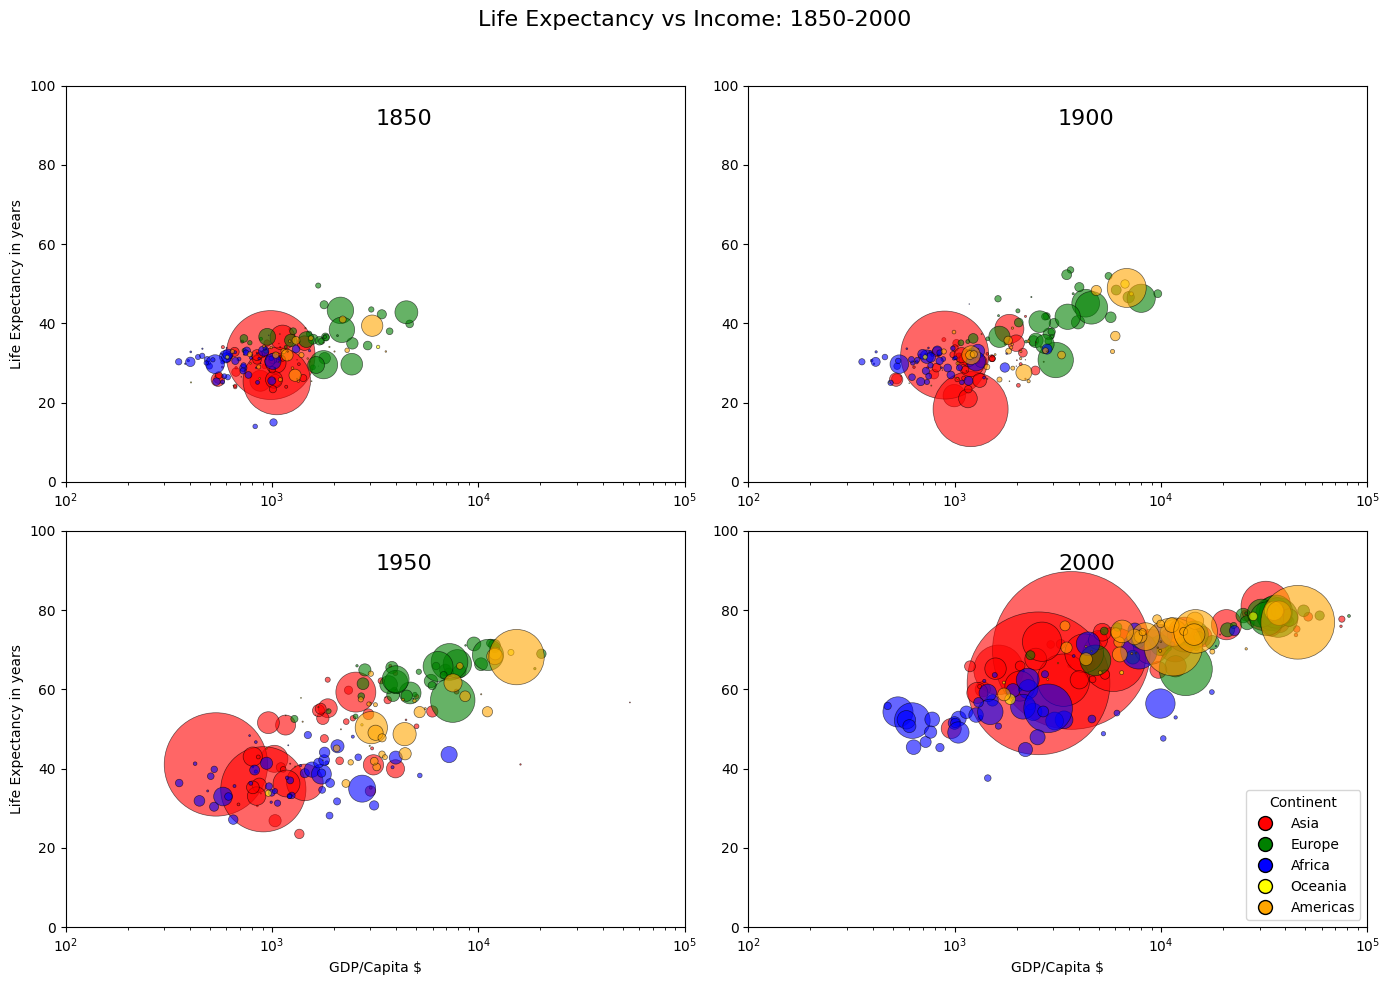

In [ ]:
# create plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Life Expectancy vs Income: 1850-2000", fontsize=16)

# iterate through each year and its corresponding subplot
for i, (ax, year) in enumerate(zip(axes.flatten(), years)):
    subset = filter_data[filter_data["Year"] == year].dropna()

    
    for continent in continent_color_map:
        cont_data = subset[subset["continent"] == continent]

        ax.scatter(
            cont_data["GDP_per_capita"],
            cont_data["Life_Expectancy"],
            s=cont_data["Population"] / 1e5,  
            color=continent_color_map[continent],
            alpha=0.6,
            edgecolors="black",
            linewidth=0.5
        )

    
    ax.set_xscale("log")
    ax.set_xlim(100, 100000)
    ax.set_ylim(0, 100)

    
    ax.text(0.5, 0.9, str(year), transform=ax.transAxes, fontsize=16)

    
    if i % 2 == 0:
        ax.set_ylabel("Life Expectancy in years")
    if i >= 2:
        ax.set_xlabel("GDP/Capita $")

    
    ax.set_xticks([100, 1000, 10000, 100000])
    ax.set_xticklabels([r"$10^2$", r"$10^3$", r"$10^4$", r"$10^5$"])


legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w',
               markerfacecolor=continent_color_map[continent],
               markeredgecolor='black', markersize=10,
               label=continent)
    for continent in continent_color_map
]
axes[1, 1].legend(handles=legend_elements, title="Continent", loc="lower right")


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
